# Project 2 Starter

## Summary

Project 2 is to facilitate students practice of the following Data Science concepts:
- Train and tune classification model
- Perform feature engineering to improve model performance
- Explain/interpret and debug model


## Tasks

The project will include following tasks:
- Load dataset. Don't use "index" column for training.
- Clean up the data:
    - Encode replace missing values
    - Replace features values that appear incorrect
    - Encode numerical variables that come as strings, for example string `$100.01` should be converted to numerical value
- Encode categorical variables
- Split dataset to Train/Test/Validation. If you perform cross-validation while tuning hyper-parameters, you don't need validation dataset.
- Add engineered features. Simple encoding (Target encoding) for individual feature doesn't count to the 10 required engineered features
- Train and tune ML models
- Provide final metrics using Test (hold-out) dataset:
    - Classification: AUC
    - Confusion matrix for best F1
- Interpret final trained model using Test dataset:
    - Global feature importance using both Shapley values and permutation feature importance
    - Summary plot with Shapley values 
    - Individual observations analysis using Shapley values. Two records for each of the scenarios with significant probability:
        - Label `0` is correctly identified
        - Label `0` is identified as `1`
        - Label `1` is correctly identified
        - Label `1` is identified as `0`
        - Significant probability means high probability of being correct/in-correct (depending on the scenario)

## Datasets

You are provided with the  dataset on eLearning. 
There were several changes made to the dataset: columns dropped/added. 

The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.  
More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied



**Don't use original datasets, use only dataset provided with project requirements in eLearning**

## Deliverables in a single zip file in the following structure:
- `notebook` (folder)
    - Jupyter notebook with complete code to manipulate data, train and tune final model. `ipynb` format
    - Jupyter notebook in `html` format
- `artifacts` (folder)
    - Model and any potential encoders in the "pkl" format or native H2O-3 format (for H2O-3 model)
    - Scoring function that will load the final model and encoders. Separate from above notebook or `.py` file

**Additional requirements:**
- Each cell in the notebook should have been run
- Use markdown to annotate and explain your code
- Use visualizations for ML explainability part


Your notebook should include explanations about your code and be designed to be easily followed. All results should be reproducible. Every cell with code should be run.

Once you are done with final version, you will need to test it by running all cells from top to bottom after restarting Kernel. It can be done by running `Kernel -> Restart & Run All`


**Important**: you might want to first produce working code using small subset of the dataset to speed up debugging process.

## Models

You will need to train and tune two types of models:
- GBM (H2O)
- LightGBM. To install LightGBM, run following command from your terminal after activating class virtual environment:  `pip install lightgbm==3.3.5` 


You will train and tune 2 models for each task for the total of 2 final models. 


First, split he dataset to Train/Validation/Test, before applying any encodings clean-up or feature engineering. 
It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


### Categorical variables encoding

Encode categorical variables using either one of the techniques below. Don't use LabelEncoder.
- One-hot-encoder for variables with less than 10 valid values. Name your new columns "Original_name"_valid_value
- (If using sklearn) Target encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_trg
- (If using H2O) Use H2O target encoder


Example of use for target encoder:
```
import category_encoders as ce

encoder = ce.TargetEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X_dirty)
```

### Feature engineering

You should train/fit categorical features encoders on Train only. Use `transform` or equivalent function on Validation/Test datasets.

It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


You should generate various new features. Examples of such features can be seen in the Module-3 lecture on GLMs.
Your final model should have at least **10** new engineered features. One-hot-encoding, label encoding, and target encoding is not included in the **10** features.

Ideas for Feature engineering for various types of variables:
1. https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/transformations.html
2. GLM lecture and hands-on (Module-3)

### Model Tuning

Perform hyper parameter tuning for both models.
- Hyper-parameter tuning. Your hyper-parameter search space should have at least 150 combinations or 150 Optuna trials.
- To avoid over-fitting and provide you with reasonable estimate of model performance on hold-out dataset, you will need to split your dataset as following:
    - Train, will be used to train model
    - Validation, will be used to validate model each round of training. Not needed if you perform cross-validation.
    - Testing, will be used to provide final performance metrics, used only once on the final model
- Feature engineering. You should add at least two engineered features.  For example, add feature which is combination of two features.
- Calculate probability threshold to maximize F1.

It should be clearly stated what parameters were selected after hyper parameters tuning. If using early stopping, make sure final model is trained with proper parameters that include number of iterations.

To simplify scoring, train single model on provided full dataset with parameters and features found in the Tuning stage.

## Scoring Function

You only need to submit single scoring function for either GBM or LightGBM model.
The scoring function will perform the following activities:
- Accept dataset in the same format as provided with the project, minus "target" column
- Load trained model and any encoders that are needed to transform data
- Transform dataset into format that can be scored with the trained model
- Score the dataset and return the results, for each record in a similar way as in Project 1:
    - Record label as determined by final model
    - You need to assign label based on maximum F1 threshold
    - Probability 

```
index	label	probability_0	probability_1
1	      0	        0.901298	0.098702
2	      1	        0.071879	0.928121
3	      1	        0.367665	0.632335
4	      1	        0.098564	0.901436
5	      0	        0.923460	0.076540
```

See Project 1 for more details on scoring function and working example.

### Threshold calculation

You will need to calculate optimal threshold for class assignment using F1 metric:
- If using sklearn, use F1 `macro`: `f1_score(y_true, y_pred, average='macro')` 
- If using H2O-3, use F1

You will need to find optimal probability threshold for class assignment, the threshold that maximizes above F1.


### Model interpretation

You should provide detailed write-up on what features are important for the model predictions. Your write-up should be written in "english" and in the way business manager can understand how the model works.
At the minimum include:
- Shapley summary graph: `shap.plots.beeswarm` 
- Shapley feature interaction graphs: `shap.plots.scatter` 
- Multiple examples of single records Shapley graphs with explanations. 
- Strong/Weak points of the model
- Are there any scenarios (particular input data) that will require over-write model prediction? 

Resources: https://github.com/slundberg/shap


### Model performance in H2O Driverless AI (performance to aim for)

I run experiments in DAI without any data manipulation. It means that potential improvement in performance can be gained after data is cleaned. 
AUC on cross-validation dataset: 0.8515
AUC on hold-out (not provided, will be evaluated on during grading): 0.855

Three top features:
- CVTE:Bank:BankState:FranchiseCode:SBA_Appv.0
- CVTE:Bank:BankState:NAICS:UrbanRural.0
- WoE:Bank:BankState:NAICS.0


CVTE: cross-validated target encoding
WoE : weight of evidence 

## Save all artifacts

Save all artifacts needed for scoring function:
- Trained model
- Encoders

You should restart your Kernel to properly test scoring function

## Model Scoring

Use example scoring function from Project 1 as the reference. 


## Load Data example

In [1]:
import os

os.getcwd( )
os.chdir('C:\\Users\\yori\\virtualenvn\\ml-spring-2023\\Lib\\csv')

In [2]:
import pandas as pd

df = pd.read_csv("SBA_loans_project_2.zip")

In [3]:
df.head(50)

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,...,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status
0,0,PRINCETON,MN,55371,PEOPLES BANK OF COMMERCE,MN,441120,4,2.0,0,...,1,0,N,N,"$114,577.00",$0.00,"$114,577.00","$85,933.00",1,0
1,1,Kansas city,MO,64116,BANK OF HAYS,KS,481111,14,1.0,0,...,0,1,N,N,"$25,000.00",$0.00,"$25,000.00","$12,500.00",7,0
2,2,BELLWOOD,PA,16617,FIRST COMMONWEALTH BANK,PA,334417,10,1.0,0,...,1,1,0,N,"$85,000.00",$0.00,"$85,000.00","$42,500.00",4,0
3,3,GRAND PRAIRIE,TX,75050,PROSPERITY BANK,TX,0,18,1.0,0,...,1,0,N,N,"$230,000.00",$0.00,"$230,000.00","$195,500.00",5,0
4,4,EL PASO,TX,79925,WESTSTAR BANK,TX,423220,4,1.0,0,...,0,1,N,N,"$32,000.00",$0.00,"$32,000.00","$16,000.00",9,0
5,5,NASHUA,IA,50658,FIRST NATIONAL BANK,IA,541940,9,1.0,0,...,1,0,N,N,"$150,000.00",$0.00,"$150,000.00","$112,500.00",7,0
6,6,DOVER,DE,19904,WILMINGTON SAVINGS FUND SOCIET,DE,235950,3,2.0,1,...,1,2,Y,N,"$90,317.00",$0.00,"$35,000.00","$17,500.00",7,0
7,7,NORRISTOWN,PA,19401,CITIZENS BANK NATL ASSOC,RI,561730,3,2.0,0,...,1,1,N,N,"$10,000.00",$0.00,"$10,000.00","$5,000.00",2,0
8,8,ACWORTH,GA,30101,CAPITAL PARTNERS CERT. DEVEL C,GA,235110,30,1.0,30,...,1,0,N,N,"$217,000.00",$0.00,"$217,000.00","$217,000.00",3,0
9,9,MADISON,SD,57042,FIRST PREMIER BANK,SD,811121,1,2.0,3,...,1,2,0,N,"$25,000.00",$0.00,"$25,000.00","$21,250.00",6,0


In [4]:
(df['MIS_Status'].value_counts()) / len(df) * 100

0    82.438293
1    17.561707
Name: MIS_Status, dtype: float64

In [5]:
from sklearn import preprocessing
import numpy as np
from scipy.sparse import hstack
import category_encoders as ce

# Remove index column
df.drop(columns=['index'], inplace=True)

In [6]:
# Replace encode Na/Null values
df = df.fillna(0)

# Convert the strings styled as '$XXXX.XX' to float values
df['DisbursementGross'] = df['DisbursementGross'].astype(str).str.replace('$','').str.replace(',','').astype(float)
df['BalanceGross'] = df['BalanceGross'].astype(str).str.replace('$','').str.replace(',','').astype(float)
df['GrAppv'] = df['GrAppv'].astype(str).str.replace('$','').str.replace(',','').astype(float)
df['SBA_Appv'] = df['SBA_Appv'].astype(str).str.replace('$','').str.replace(',','').astype(float)

# Replace N in RevLineCr and LowDoc with 1
df.replace({'RevLineCr': {'N': 1}, 'LowDoc': {'N': 1}}, inplace=True)

# Encode categorical variables
cat_vars = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc']
for var in cat_vars:
    df[var] = df[var].astype(str)  # convert to string data type
    le = preprocessing.LabelEncoder()
    df[var] = le.fit_transform(df[var])

# Create a target encoder for zip codes
zip_encoder = ce.TargetEncoder(cols=['Zip'])

# Fit the encoder on the training data and transform both the training and test data
df['Zip_encoded'] = zip_encoder.fit_transform(df['Zip'], df['MIS_Status'])

# Additional clean-up (for example, drop unnecessary columns or rows)
df = df.dropna()

# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)

C:\Users\yori\AppData\Local\Temp\ipykernel_19208\141250928.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['DisbursementGross'] = df['DisbursementGross'].astype(str).str.replace('$','').str.replace(',','').astype(float)
C:\Users\yori\AppData\Local\Temp\ipykernel_19208\141250928.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['BalanceGross'] = df['BalanceGross'].astype(str).str.replace('$','').str.replace(',','').astype(float)
C:\Users\yori\AppData\Local\Temp\ipykernel_19208\141250928.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as litera

In [8]:
# Create new features based on existing columns
df['job_change'] = df['CreateJob'] - df['RetainedJob']
df['gross_approval_ratio'] = df['GrAppv'] / df['DisbursementGross']
df['credit_rev_ratio'] = df['BalanceGross'] / df['DisbursementGross']

# Save the updated dataset
df.to_csv('engineered_data.csv', index=False)

In [9]:
df_e = pd.read_csv("engineered_data.csv")
df20 = df_e.head(50)

In [10]:
df20

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,...,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status,Zip_encoded,job_change,gross_approval_ratio,credit_rev_ratio
0,21881,24,55371,4063,27,441120,4,2.0,0,0,...,114577.0,0.0,114577.0,85933.0,1,0,0.144851,0,1.000000,0.0
1,13737,25,64116,543,20,481111,14,1.0,0,14,...,25000.0,0.0,25000.0,12500.0,7,0,0.108528,-14,1.000000,0.0
2,1739,39,16617,2223,42,334417,10,1.0,0,2,...,85000.0,0.0,85000.0,42500.0,4,0,0.149662,-2,1.000000,0.0
3,10315,44,75050,4240,48,0,18,1.0,0,0,...,230000.0,0.0,230000.0,195500.0,5,0,0.167488,0,1.000000,0.0
4,7789,44,79925,5645,48,423220,4,1.0,0,4,...,32000.0,0.0,32000.0,16000.0,9,0,0.192857,-4,1.000000,0.0
5,18528,13,50658,2327,16,541940,9,1.0,0,0,...,150000.0,0.0,150000.0,112500.0,7,0,0.173847,0,1.000000,0.0
6,6789,9,19904,5663,10,235950,3,2.0,1,2,...,90317.0,0.0,35000.0,17500.0,7,0,0.238236,-1,0.387524,0.0
7,19109,39,19401,1188,44,561730,3,2.0,0,3,...,10000.0,0.0,10000.0,5000.0,2,0,0.134456,-3,1.000000,0.0
8,128,11,30101,968,13,235110,30,1.0,30,30,...,217000.0,0.0,217000.0,217000.0,3,0,0.271181,0,1.000000,0.0
9,15794,42,57042,2479,46,811121,1,2.0,3,4,...,25000.0,0.0,25000.0,21250.0,6,0,0.062618,-1,1.000000,0.0


In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train, test = train_test_split(df_e, test_size=0.2, random_state=42)

# Create LightGBM Models

In [14]:
import lightgbm as lgb

# Set response variable and predictor columns
response_col = 'MIS_Status'
predictors = train.columns.drop(response_col)

# Convert data to LightGBM datasets
train_data = lgb.Dataset(train[predictors], label=train[response_col])
test_data = lgb.Dataset(test[predictors], label=test[response_col])

# Set up LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model
num_rounds = 100
model = lgb.train(params, train_data, num_rounds, valid_sets=[test_data], early_stopping_rounds=10)

# Make predictions on test set
preds = model.predict(test[predictors])

c:\users\yori\virtualenvn\ml-spring-2023\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 113509, number of negative: 532451
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3414
[LightGBM] [Info] Number of data points in the train set: 645960, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.175721 -> initscore=-1.545609
[LightGBM] [Info] Start training from score -1.545609
[1]	valid_0's binary_logloss: 0.455797
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.448845
[3]	valid_0's binary_logloss: 0.443058
[4]	valid_0's binary_logloss: 0.437709
[5]	valid_0's binary_logloss: 0.432926
[6]	valid_0's binary_logloss: 0.428336
[7]	valid_0's binary_logloss: 0.424402
[8]	valid_0's binary_logloss: 0.420551
[9]	valid_0's binary_logloss: 0.416866
[10]	valid_0's binary_lo

## Saving Artifacts

In [46]:
import pickle

# Save LabelEncoder object as a pickle file
with open('label_encoder.pkl', 'wb') as labelart:
    pickle.dump(le, labelart)

# Save TargetEncoder object as a pickle file
with open('target_encoder.pkl', 'wb') as zip:
    pickle.dump(zip_encoder, zip)

# Save the model to disk
filename = 'lightgbm_model.pkl'
pickle.dump(model, open(filename, 'wb'))

## Feature Importance

c:\users\yori\virtualenvn\ml-spring-2023\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Feature Importance:
                 Feature  Importance
3                   Bank         463
5                  NAICS         351
4              BankState         313
19           Zip_encoded         269
21  gross_approval_ratio         245
12             RevLineCr         227
17              SBA_Appv         215
10         FranchiseCode         160
2                    Zip         126
11            UrbanRural         103
8              CreateJob          82
16                GrAppv          74
1                  State          71
6                  NoEmp          67
7               NewExist          64
14     DisbursementGross          64
9            RetainedJob          57
20            job_change          49
0                   City           0
18               LoanInd           0
15          BalanceGross           0
13                LowDoc           0
22      credit_rev_ratio           0


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


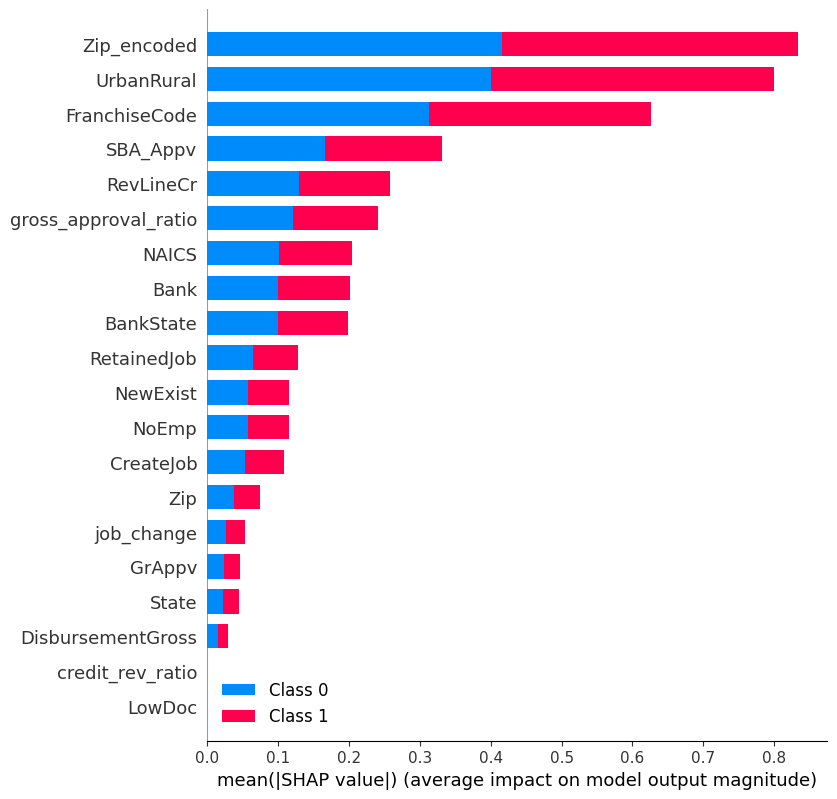

In [18]:
import shap

# Get feature importance
importance_df = pd.DataFrame({
    'Feature': predictors,
    'Importance': model.feature_importance(),
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print('Feature Importance:')
print(importance_df)

# Get SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[predictors])

# Plot summary plot
shap.summary_plot(shap_values, test[predictors])